<a href="https://colab.research.google.com/github/brahma102/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Importing the required packages





In [30]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization 
import plotly.express as px       # for data visualization
from sklearn.impute import SimpleImputer


# **Play Store Data**
## Read the dataset into dataframe

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# reading dataset
path  = "/content/drive/MyDrive/Colab Notebooks/Capstone Project 1/"
df1 = pd.read_csv(path + "Play Store Data.csv")
df3 = pd.read_csv(path + "User Reviews.csv")

In [33]:
# displaying the head or the first 10 rows of the dataframe
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [34]:
# look at the random 5 records in the apps dataframe
df1.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
214,Easy Installer - Apps On SD,BUSINESS,4.1,23055,Varies with device,"5,000,000+",Free,0,Everyone,Business,"June 8, 2018",Varies with device,Varies with device
2090,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10216997,Varies with device,"100,000,000+",Free,0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device
4437,Prime Key for Nougat Launcher& O Launcher &KitKat,PERSONALIZATION,4.1,324,313k,"5,000+",Paid,$6.99,Everyone,Personalization,"August 20, 2017",5.1,5.1 and up
6260,BH Açaí,FOOD_AND_DRINK,NaN,3,4.7M,100+,Free,0,Everyone,Food & Drink,"May 29, 2018",7.0 RELEASE,4.0.3 and up
9509,EK Carevec,FAMILY,NaN,1,29M,10+,Free,0,Teen,Entertainment,"July 17, 2018",2.177.5489,4.3 and up


In [35]:
#Informatation of app dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Description of App Dataset columns
App : The name of the app

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [36]:
# type of Category
x=df1['Category'].unique()
print('Total no of category of app present in playstore is:-',len(x))

Total no of category of app present in playstore is:- 34


By diagnosing the data frame, we know that:

There are 13 columns of properties with 10841 rows of data.

Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'

Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

## Data cleaning

In [37]:
#Convert install coloum string to int
def convert_int(x):
    x=x+','+'+'+'M'+'k'+'$'  
    x=x.replace(',','')
    x=x.replace('+','')
    x=x.replace('M','')
    x=x.replace('k','')
    x=x.replace('$','')
    if x=='Free' or x=='Varies with device'or x=='Everyone':
        x=0
    #elif x==
    else:
        x=eval(x)
    
 
    return x
df1['Installs']=df1['Installs'].apply(convert_int)

In [ ]:
#convert size obj to int and price
df1['Size_int']=df1['Size'].apply(convert_int)
df1['Price']=df1['Price'].apply(convert_int)
df1['Reviews']=df1['Reviews'].apply(convert_int)

In [ ]:
# Remove wich app reating is more than 5
r=df1[df1['Rating']>5].index 
r
df1=df1.drop(r)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [39]:
# check on null values
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

median=In statistics and probability theory, the median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. For a data set, it may be thought of as "the middle" value

In [40]:
x=df1['Rating'].median()
x
df1['Rating']=df1['Rating'].fillna(x)

In [ ]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_int          0
dtype: int64

In [41]:
#Remove the app which has contain no type
y=df1[df1['Type'].isna()].index
df1=df1.drop(index=y)
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [42]:
#Based on higest riview we creat the data set and change the 
df2=pd.DataFrame(df1)
df2.sort_values(by='Reviews',ascending=False, inplace=True)

df2=df2.drop_duplicates(subset=['App'])
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,1000000,Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000,Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000,Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000,Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,CE-STRONG,FAMILY,4.3,0,16M,100,Free,0,Everyone,Education,"June 17, 2016",1.0.4,4.0 and up
6492,Anime Mod for BM,BOOKS_AND_REFERENCE,4.3,0,8.0M,100,Free,0,Everyone,Books & Reference,"July 28, 2017",1.0,4.0 and up
7221,CE-SETRAM l’Appli,LIBRARIES_AND_DEMO,4.3,0,2.6M,100,Free,0,Everyone,Libraries & Demo,"December 5, 2017",1.1.8,4.0.3 and up
5480,Glanceable Ap Watch Face,PERSONALIZATION,4.3,0,11M,5,Paid,$0.99,Everyone,Personalization,"August 14, 2016",1.0.103,4.4 and up


In [43]:
# check on statistical information of the dataframe
df2.describe()

,Rating,Installs
count,9659.000000,9.659000e+03
mean,4.193830,7.780208e+06
std,0.518673,5.376003e+07
min,1.000000,0.000000e+00
25%,4.000000,1.000000e+03
50%,4.300000,1.000000e+05
75%,4.500000,1.000000e+06
max,19.000000,1.000000e+09


# Data visualization

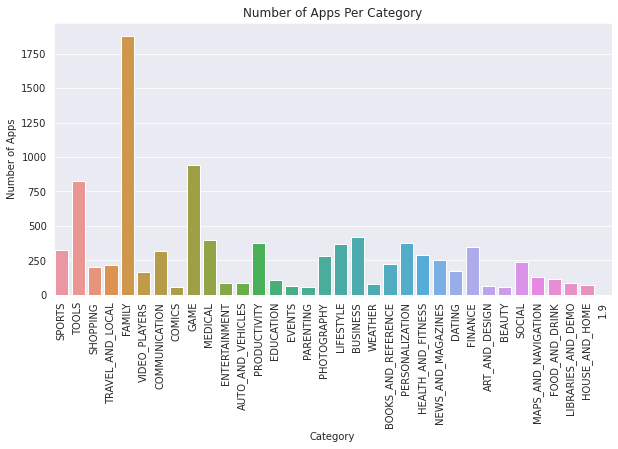

In [44]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df2)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [45]:
#Count total no of instalation
users=df2.groupby(['Category'])['Installs'].sum().reset_index()
users

,Category,Installs
0,1.9,0
1,ART_AND_DESIGN,113238100
2,AUTO_AND_VEHICLES,53130211
3,BEAUTY,27197050
4,BOOKS_AND_REFERENCE,1665969576
5,BUSINESS,697164865
6,COMICS,44981150
7,COMMUNICATION,11038276251
8,DATING,140926107
9,EDUCATION,189451000


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 2989 to 9104
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9658 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9656 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


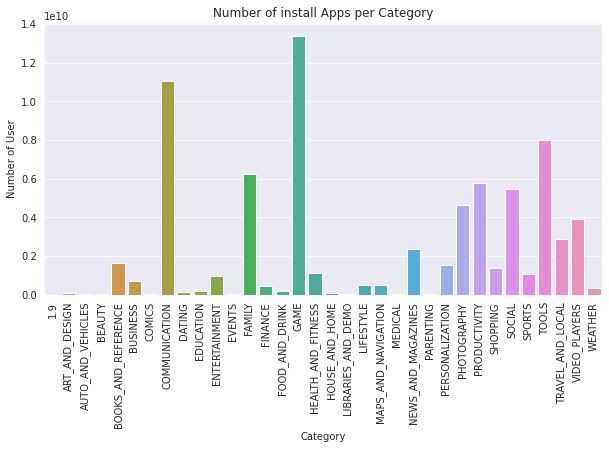

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x='Category',y='Installs',data=users)
plt.title('Number of install Apps per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of User')
plt.show()

As for the above graph we colclude that most user showing there intrest in Gaming app and after game people show there intrest in communication apps.
The highest install app is Game app and communicatation app is in second

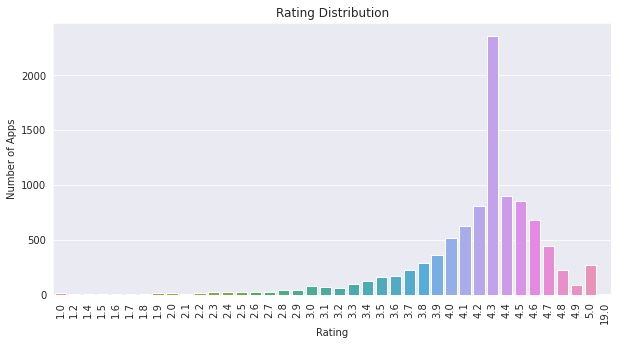

In [48]:
# show the distribution of rating
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df2)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

In [49]:
#Ratin as compare to no of installs ,as for size,as for price and as for review
rating=df2.groupby(['Rating']).sum().reset_index()
rating.head()

,Rating,Installs
0,1.0,5170
1,1.2,1000
2,1.4,7000
3,1.5,1105
4,1.6,152000


In [70]:
# fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# axes[0].plot(rating['Rating'], rating['Reviews'])
# axes[0].set_xlabel('Rating')
# axes[0].set_ylabel('Reviews')
# axes[0].set_title('Reviews Per Rating')

# axes[1].plot(rating['Rating'], rating['Size_int'] )
# axes[1].set_xlabel('Rating')
# axes[1].set_ylabel('Size')
# axes[1].set_title('Size Per Rating')

# axes[2].plot(rating['Rating'], rating['Installs'] )
# axes[2].set_xlabel('Rating')
# axes[2].set_ylabel('Installs')
# axes[2].set_title('Installs Per Rating')

# axes[3].plot(rating['Rating'], rating['Price'] )
# axes[3].set_xlabel('Rating')
# axes[3].set_ylabel('Price')
# axes[3].set_title('Price Per Rating')

# plt.tight_layout(pad=2)
# plt.show()

From the above graphs, we found that most of the apps whose rating range is in between 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



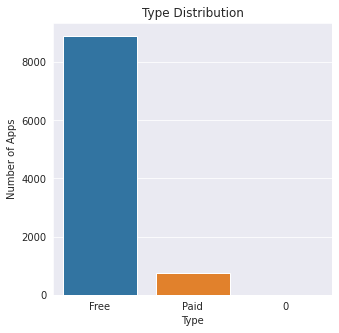

In [54]:
# application type distribution
#Here we use count plot because here we count a paricular coloum comparision
plt.figure(figsize=(5, 5))
sns.countplot(df2['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

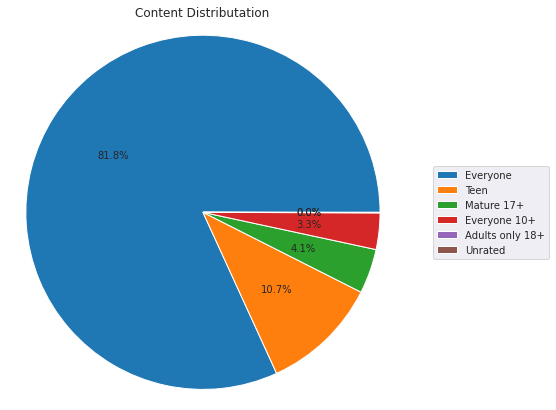

In [55]:
 
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

number_of_apps = df2['Content Rating'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Content Distributation')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

In [62]:
# sns.jointplot(y ='Size_int', x ='Rating', data = df2, kind ='hex')
# max=df2[df2['Size_int']==df2['Size_int'].max()]
# max

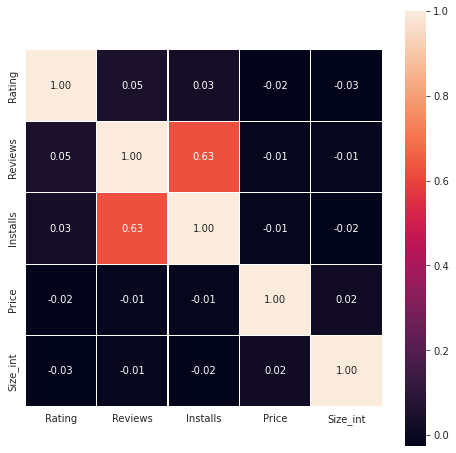

In [ ]:
#Corilation with each catagory to other catagory by using heat map
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df2.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

Frome the above heat map we found that as for instalation of app incress reviews of the app also incress..So the highest used app incress the review

## some important point we get after Data visualization 

In [57]:
df = df2.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
464,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device


In [63]:
#Top 5 riviewed app by user
df2.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,1000000,Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000,Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000,Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000,Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


In [64]:
# What is the top 5 expensive apps?

df = df2.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
6863,Bacterial vaginosis Treatment - Sexual disease,HEALTH_AND_FITNESS,5.0,2,5.9M,500,Free,0,Everyone,Health & Fitness,"June 25, 2018",2.0,4.0.3 and up
10562,FK Atlantas,SPORTS,1.5,2,26M,5,Free,0,Everyone,Sports,"February 21, 2018",1.0,4.1 and up
10816,FieldBi FR Offline,BUSINESS,4.3,2,6.8M,100,Free,0,Everyone,Business,"August 6, 2018",2.1.8,4.1 and up
9427,ei Calc,TOOLS,5.0,2,19M,10,Free,0,Everyone,Tools,"October 12, 2015",1.2.2,2.3 and up


### As before we see the most install category app is Game 

In [65]:
#  What is the top 5 most installed apps in Game category?
# Top 5 popular game as for highest no of instalation
df = df2[df2['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1872,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1920,Temple Run 2,GAME,4.3,8119154,62M,500000000,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1885,Pou,GAME,4.3,10486018,24M,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1908,My Talking Tom,GAME,4.5,14892469,Varies with device,500000000,Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up


### As for our analysis we see that the the highest no of app present from family catagory but after that with compare of game app the user of family catagory is likely half of that.

In [66]:
# Which 5 apps from the 'FAMILY' category are having the lowest rating?

df = df2[df2['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head()
#As for rating those app not get good responce frome user .
#Those 5 app are in last 5 position frome highest app catagory(Family).

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21M,1000,Free,0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402,1.7M,100000,Free,0,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up
9176,EB Mobile,FAMILY,1.7,1172,5.6M,10000,Free,0,Everyone,Education,"October 9, 2017",1.1.2,4.1 and up


# Conclusion

The Google Play Store Apps report provides some useful details regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY but still used most. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. 
 The size and price   shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans ,google apps etc.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store . As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

In [71]:
#second datset
df3.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
33949,Diary with lock,"I used much faults found far. Given I'm 24, I ...",Positive,0.192961,0.476042
44841,Fast News,Too many add's can't read story,Positive,0.500000,0.500000
12418,Bank of America Mobile Banking,"Very happy app, personal bank palm hand. Easy ...",Positive,0.483333,0.683333
43250,Facetune - Ad Free,NaN,NaN,NaN,NaN
24086,Capital One® Mobile,NaN,NaN,NaN,NaN


In [72]:
df4=pd.merge(df2,df3,how='inner',on='App')   
df4.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
380,AirAsia,TRAVEL_AND_LOCAL,3.9,98585,37M,10000000,Free,0,Everyone,Travel & Local,"July 16, 2018",5.0.4,4.4 and up,"Cannot login account setting, keep shows faile...",Negative,-0.250000,0.183333
32531,Calculator - unit converter,PRODUCTIVITY,4.7,287250,Varies with device,50000000,Free,0,Everyone,Productivity,"May 9, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
52249,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,Love game I'm issues requesting gifts club adv...,Positive,0.243333,0.470000
14721,Google Translate,TOOLS,4.4,5745093,Varies with device,500000000,Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
46556,FamilySearch Tree,BOOKS_AND_REFERENCE,4.3,17506,17M,1000000,Free,0,Everyone,Books & Reference,"July 20, 2018",2.3.18,4.1 and up,Its best family I love,Positive,0.750000,0.450000
